In [1]:
import os
import shutil
from zipfile import ZipFile 
import pandas as pd
import re

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

from sklearn.feature_extraction.text import CountVectorizer
import PIL.Image
from IPython.display import display

import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
direccion = 'Consid_txt.zip'

In [3]:
# Descomprimir el archivo ZIP
with ZipFile(direccion) as archivo: 
    archivo.extractall('Consid_txt/')  

In [4]:
d = dict()
for ruta, carpetas, archivos in os.walk('./Consid_txt/Consid_txt/'):
    for archivo in archivos:
        with open(ruta + "/" + archivo, encoding="utf-8") as libro:
            texto = ""
            dfLibros = []
            datoLibros = libro.read()
            dfLibros.append(datoLibros)
            d[archivo] = datoLibros
            for element in dfLibros:
                dfElementos = []
                dfElementos.append(element.strip())
                texto = texto + element + " "
            print ("En la sentencia " + archivo + " Hay " + str(len(texto.split())) + " Palabras")

En la sentencia 1045a-10_Consid.pdf.txt Hay 16874 Palabras
En la sentencia 11001-03-15-000-2013-02635-00_Consid.pdf.txt Hay 4428 Palabras
En la sentencia 11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt Hay 15895 Palabras
En la sentencia 11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt Hay 3728 Palabras
En la sentencia 11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt Hay 9997 Palabras
En la sentencia 11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt Hay 8276 Palabras
En la sentencia 11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt Hay 19762 Palabras
En la sentencia 11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt Hay 8342 Palabras
En la sentencia 11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt Hay 16836 Palabras
En la sentencia 11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt Hay 15556 Palabras
En la sentencia 11001-03-15-000-2018-00669-00_Consid.pdf.txt Hay 10630 Palabras
En la sentencia 11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt Hay 17857 Palabras
En la sentencia 11001-03-15-00

In [5]:
dfTotalLibros = pd.DataFrame(list(d.items()), columns =['NombreSentencias','Texto']) 
dfTotalLibros

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...  
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...  
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...  
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...  
4   CONSIDERACIONES \n \nPara resolver la impugnac...  
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...  
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...  
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...  
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...  
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...  
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...  
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...  
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...  
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...  
14  . Consideraciones \n \n3.1. Competencia \nDe a...  
15  CONSIDERACIONES DE LA SALA \n \n1. \nGeneralid...  
16  VI

#### preprocesamiento de texto

In [6]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [7]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros
data=dfTotalLibros
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

### Vamos a hacer matriz transpuesta con TFIDF

In [8]:
import re
import pandas as pd
import numpy as np

In [9]:
data['conteo'] = data['textoLimpio'].apply(lambda fila:len(fila.split()))
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(data['textoLimpio'].values)
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [12]:
tf = pd.DataFrame(bow_rep.toarray())
tf.columns = count_vect.get_feature_names()
tf.index = data['NombreSentencias'].index

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(data['textoLimpio'].values)

In [14]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.00892746, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01102997,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00589851,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00237953, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
tfidf_matrix=pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index=data.NombreSentencias

In [16]:
tfidf_matrix

aarhus       aas  \
NombreSentencias                                                         
1045a-10_Consid.pdf.txt                             0.000000  0.000000   
11001-03-15-000-2013-02635-00_Consid.pdf.txt        0.000000  0.000000   
11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2018-00669-00_Consid.pdf.txt        0.000000  0.000000   
11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2018-01946-01(AC)2018-02067-01 ...  0.000000  0.000000   
11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt    0.000000  0.000000   
11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt    0.000000  0.000000   
256-15_Consid.pdf.txt                               0.000000  0.000000   
273-16_Consid.pdf.txt                               0.000000  0.000000   
275-19_Consid.pdf.txt                               0.000000  0.000000   
298-16_Consid.pdf.txt                               0.000000  0.000000   
331-12_Consid.pdf.txt                               0.000000  0.000000   
342-19_Consid.pdf.txt                               0.000000  0.000000   
361-17_Consid.pdf.txt                               0.005637  0.000000   
366-11_Consid.pdf.txt                               0.000000  0.000000   
395-12.pdf.txt                                      0.000000  0.000000   
438-15_Consid.pdf.txt                               0.000000  0.000000   
462A-14_Consid.pdf.txt                              0.000000  0.002994   
530-16_Consid.pdf.txt                               0.000000  0.000000   
547-10_Consid.pdf.txt                               0.000000  0.000000   
568-17_Consid.pdf.txt                               0.000000  0.000000   
622-16_Consdi.pdf.txt                               0.002088  0.000000   
652-98_Consid.pdf.txt                               0.000000  0.000000   
737-17_Consid.pdf.txt                               0.000000  0.000000   
766-15_Consid.pdf.txt                               0.000000  0.000000   
955-03_Consid.pdf.txt                               0.000000  0.000000   
A053-17.pdf.txt                                     0.000000  0.000000   
A281-19.pdf.txt                                     0.000000  0.000000   
C-035-16_Consid.pdf.txt                             0.000000  0.000000   
C-123-14_Consid.pdf.txt                             0.000000  0.000000   
C-389-16_Consid.pdf.txt                             0.000000  0.000000   
C-535-96_Consid.pdf.txt                             0.000000  0.000000   
C-795-00_Consid.pdf.txt                             0.000000  0.000000   
SU095-18_Consid.pdf.txt                             0.000000  0.000000   
Su411-20_Consid.pdf.txt                             0.000000  0.000000   
SU698-17_Consid.pdf.txt                             0.000000  0.000000   
SU_133-17_SV.pdf.txt                                0.000000  0.000000   
T-272-17_consi.pdf.txt                              0.000000  0.000000   
T-445-16_Consid.pdf.txt                             0.000000  0.000000   
T-614-19_Consid.pdf.txt                             0.000000  0.000000   
T-713-17_Consid.pdf.txt                             0.0000

In [17]:
tfidf_matrix=tfidf_matrix.T.round(3)
tfidf_matrix

NombreSentencias  1045a-10_Consid.pdf.txt  \
aarhus                              0.000   
aas                                 0.000   
aati                                0.000   
ab                                  0.000   
abajo                               0.000   
...                                   ...   
único                               0.002   
únicos                              0.000   
útil                                0.009   
útiles                              0.000   
μg                                  0.000   

NombreSentencias  11001-03-15-000-2013-02635-00_Consid.pdf.txt  \
aarhus                                                   0.000   
aas                                                      0.000   
aati                                                     0.000   
ab                                                       0.000   
abajo                                                    0.000   
...                                                        ...   
único                                                    0.018   
únicos                                                   0.000   
útil                                                     0.000   
útiles                                                   0.000   
μg                                                       0.000   

NombreSentencias  11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt  \
aarhus                                                       0.000   
aas                                                          0.000   
aati                                                         0.000   
ab                                                           0.000   
abajo                                                        0.000   
...                                                            ...   
único                                                        0.000   
únicos                                                       0.000   
útil                                                         0.000   
útiles                                                       0.011   
μg                                                           0.000   

NombreSentencias  11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt  \
aarhus                                                       0.000   
aas                                                          0.000   
aati                                                         0.000   
ab                                                           0.000   
abajo                                                        0.000   
...                                                            ...   
único                                                        0.000   
únicos                                                       0.018   
útil                                                         0.000   
útiles                                                       0.000   
μg                                                           0.000   

NombreSentencias  11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt  \
aarhus                                                         0.0   
aas                                                            0.0   
aati                                                           0.0   
ab                                                             0.0   
abajo                                                          0.0   
...                                                            ...   
único                                                          0.0   
únicos                                                         0.0   
útil                                                           0.0   
útiles                                                         0.0   
μg                                                             0.0   

NombreSentencias  11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt  \
aarhus                                                       0.000   
aas

### Cálculo de la distancia del coseno

In [18]:
from sklearn.metrics.pairwise import cosine_distances
dist_cos=cosine_distances(tfidf_matrix.T.values)
dist_cos

array([[0.        , 0.65977916, 0.71418497, ..., 0.5573004 , 0.70745322,
        0.6064299 ],
       [0.65977916, 0.        , 0.49816552, ..., 0.46502509, 0.71478868,
        0.76476735],
       [0.71418497, 0.49816552, 0.        , ..., 0.45586481, 0.79546183,
        0.79850488],
       ...,
       [0.5573004 , 0.46502509, 0.45586481, ..., 0.        , 0.58983839,
        0.69354164],
       [0.70745322, 0.71478868, 0.79546183, ..., 0.58983839, 0.        ,
        0.78559203],
       [0.6064299 , 0.76476735, 0.79850488, ..., 0.69354164, 0.78559203,
        0.        ]])

In [19]:
dist_cos=cosine_distances(tfidf_matrix.T.values)
dist_cos= pd.DataFrame(dist_cos, columns = tfidf_matrix.columns, index = tfidf_matrix.columns)
dist_cos

NombreSentencias                                    1045a-10_Consid.pdf.txt  \
NombreSentencias                                                              
1045a-10_Consid.pdf.txt                                            0.000000   
11001-03-15-000-2013-02635-00_Consid.pdf.txt                       0.659779   
11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt                   0.714185   
11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt                   0.813103   
11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt                   0.641572   
11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt                   0.685347   
11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt                   0.586757   
11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt                   0.634480   
11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt                   0.657886   
11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt                   0.617854   
11001-03-15-000-2018-00669-00_Consid.pdf.txt                       0.672079   
11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt                   0.582371   
11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt                   0.702949   
11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt                   0.707729   
11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt                   0.650810   
11001-03-15-000-2018-01946-01(AC)2018-02067-01 ...                 0.760830   
11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt                   0.655235   
11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt                   0.671940   
11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt                   0.717839   
256-15_Consid.pdf.txt                                              0.574320   
273-16_Consid.pdf.txt                                              0.705400   
275-19_Consid.pdf.txt                                              0.691406   
298-16_Consid.pdf.txt                                              0.640130   
331-12_Consid.pdf.txt                                              0.465948   
342-19_Consid.pdf.txt                                              0.637773   
361-17_Consid.pdf.txt                                              0.645697   
366-11_Consid.pdf.txt                                              0.289563   
395-12.pdf.txt                                                     0.398527   
438-15_Consid.pdf.txt                                              0.240618   
462A-14_Consid.pdf.txt                                             0.424397   
530-16_Consid.pdf.txt                                              0.404652   
547-10_Consid.pdf.txt                                              0.256915   
568-17_Consid.pdf.txt                                              0.393480   
622-16_Consdi.pdf.txt                                              0.560125   
652-98_Consid.pdf.txt                                              0.526284   
737-17_Consid.pdf.txt                                              0.605045   
766-15_Consid.pdf.txt                                              0.252618   
955-03_Consid.pdf.txt                                              0.491022   
A053-17.pdf.txt                                                    0.698406   
A281-19.pdf.txt                                                    0.790774   
C-035-16_Consid.pdf.txt                                            0.666913   
C-123-14_Consid.pdf.txt                                            0.656375   
C-389-16_Consid.pdf.txt                                            0.419912   
C-535-96_Consid.pdf.txt                                            0.764847   
C-795-00_Consid.pdf.txt                                            0.805769   
SU095-18_Consid.pdf.txt                                            0.587992   
Su411-20_Consid.pdf.txt                                            0.656540   
SU698-17_Consid.pdf.txt                                            0.812294   
SU_133-17_SV.pdf.txt                              

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt

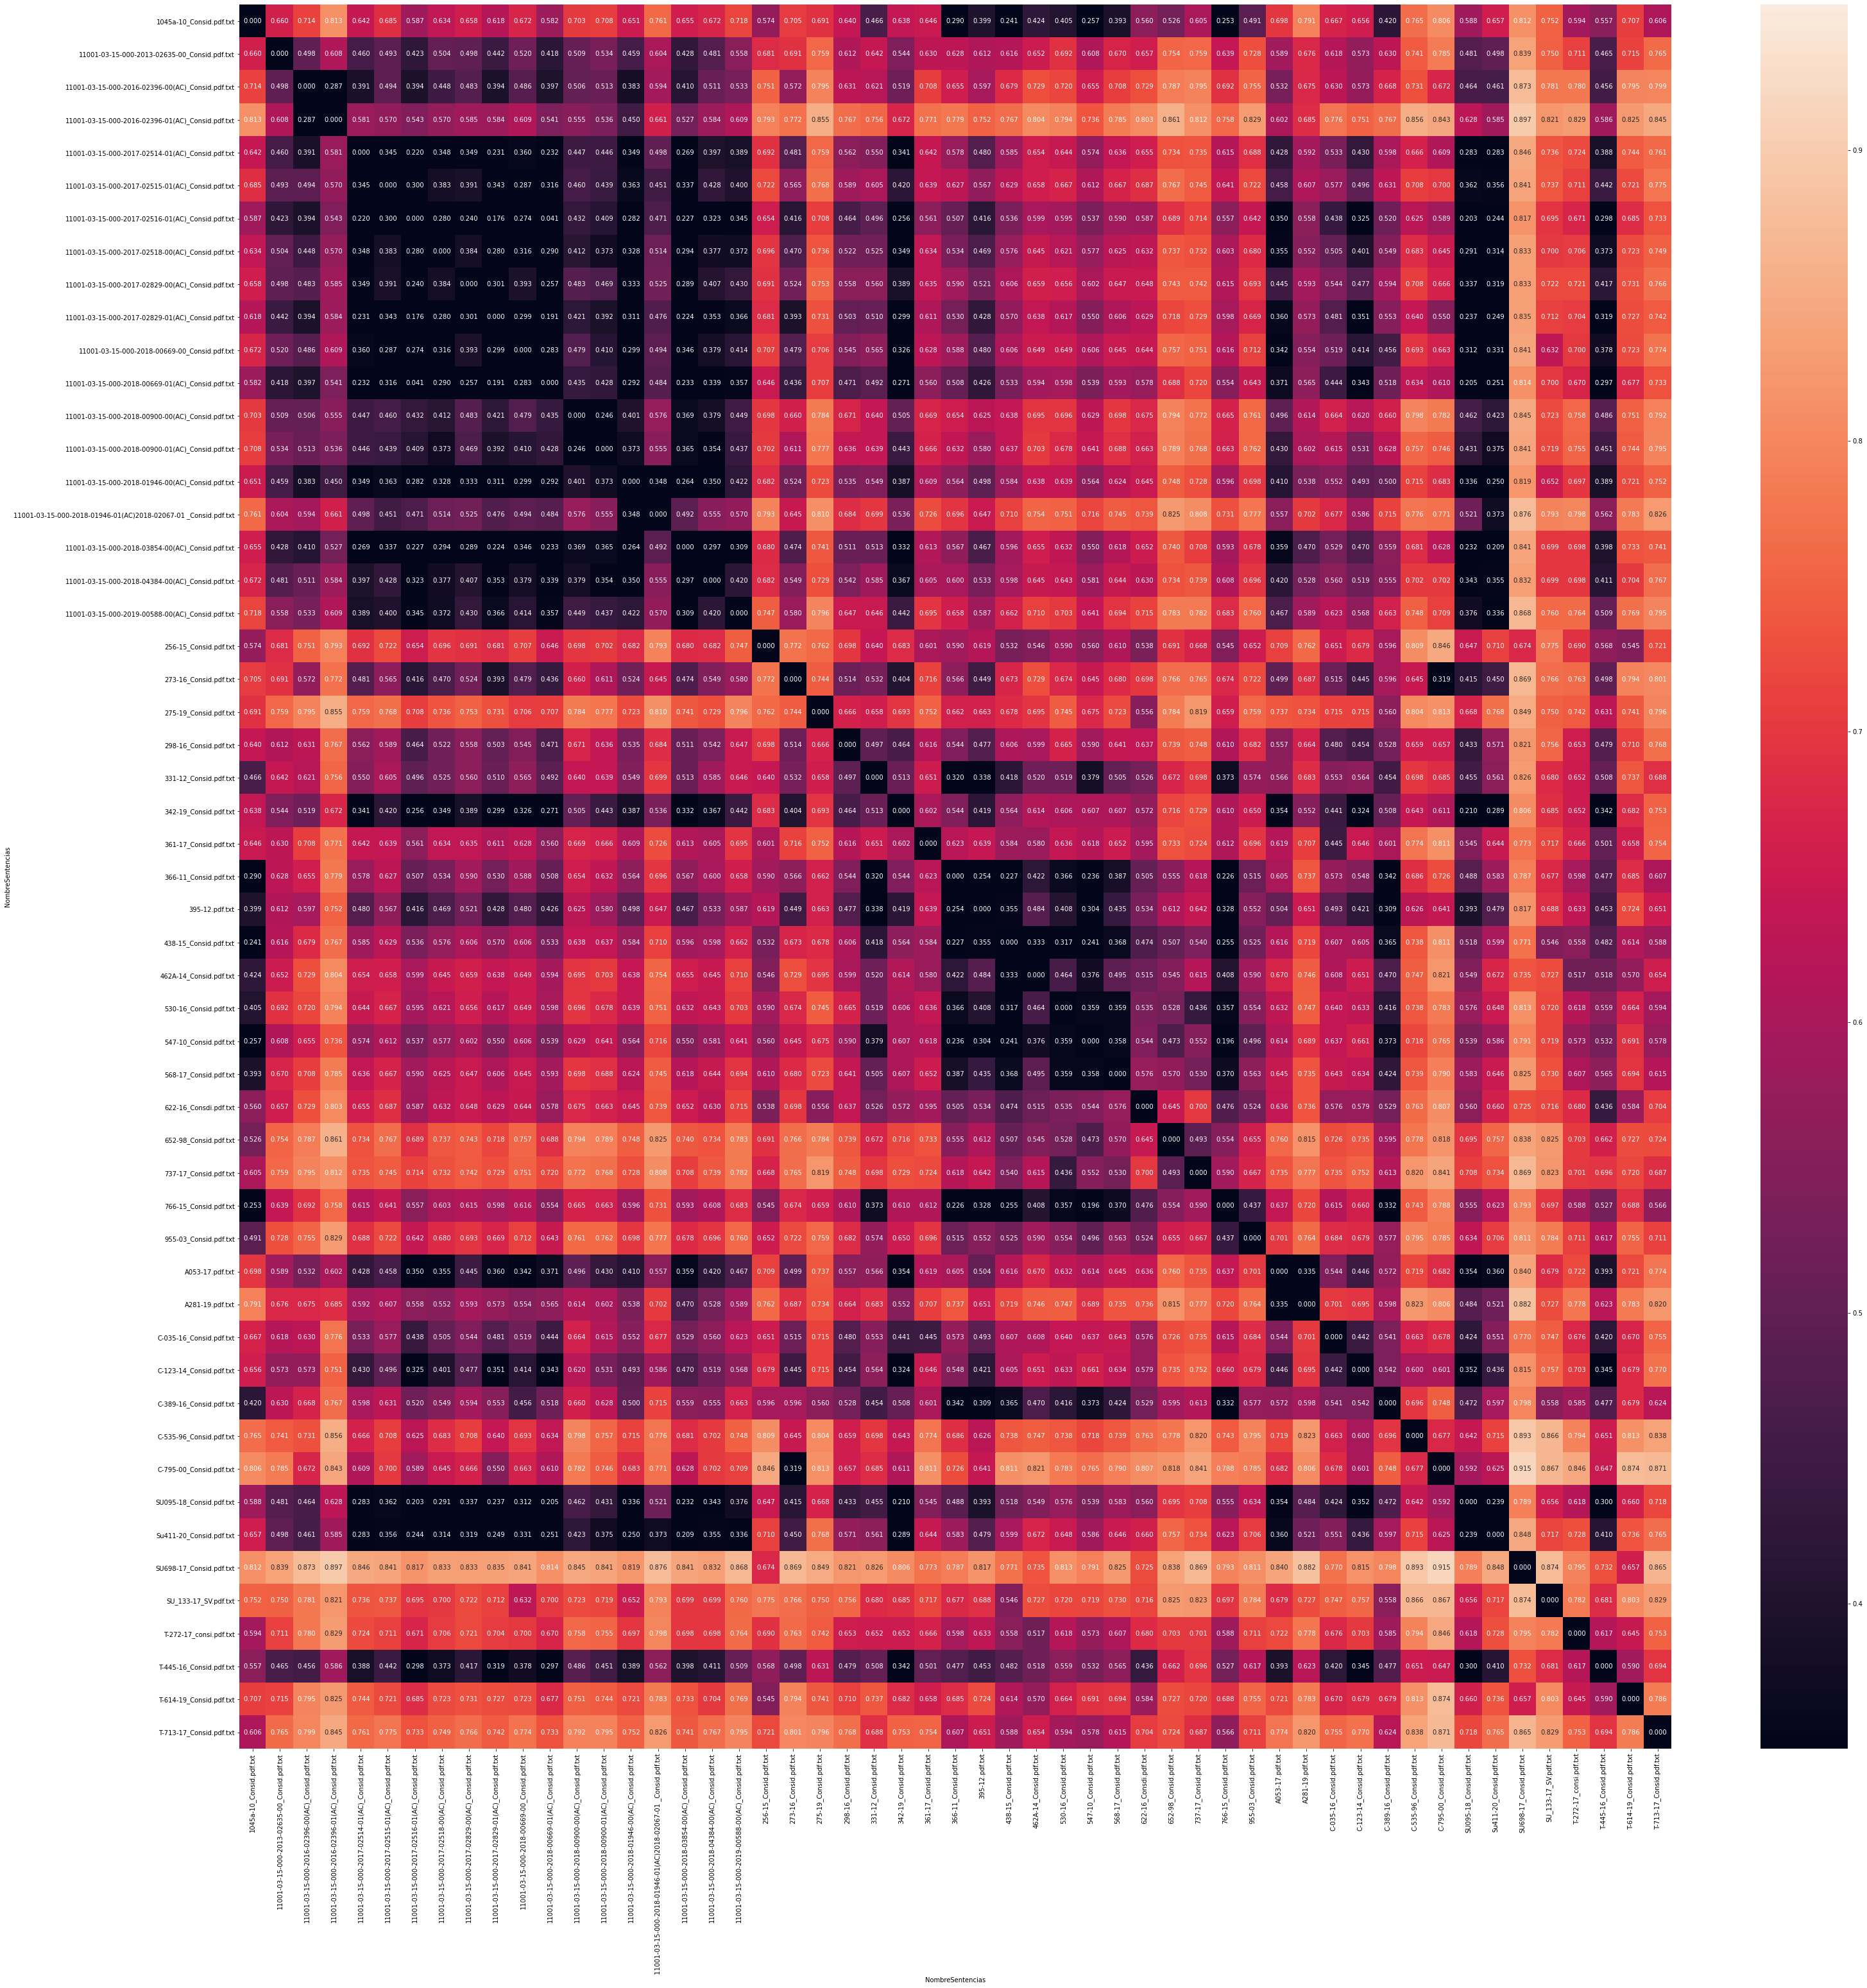

In [21]:
fig, ax = plt.subplots(figsize=(50,50))
sn.heatmap(dist_cos
           , annot=True
           , vmin=0.35
           , vmax=0.95
           , fmt=".3f"
           , ax=ax
          )

### Visualización K-means

In [22]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [23]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros
data=dfTotalLibros
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [24]:
tfidf_vect_3 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect_3.fit_transform(data.textoLimpio.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect_3.get_feature_names())
tfidf_matrix

aarhus       aas      aati        ab     abajo  abandona  abandonada  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.000000  0.013010    0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
25  0.005637  0.000000  0.000000  0.000000  0.005393  0.000000    0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.008754  0.000000    0.000000   
27  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
29  0.000000  0.002994  0.000000  0.000000  0.001946  0.000000    0.002511   
30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
32  0.000000  0.000000  0.006618  0.000000  0.000000  0.000000    0.000000   
33  0.002088  0.000000  0.000000  0.000000  0.002997  0.000000    0.001933   
34  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
35  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
36  0.000000  0.000000  0.000000  0.000000  0.000000  0.006262    0.000000   
37  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
38  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
39  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
40  0.000000  0.000000  0.000000  0.000000  0.001829  0.000000    0.000000   
41  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
42  0.000000  0.000000  0.000000  0.000000  0.002093  0.000000    0.000000   
43  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
44  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
45  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
46  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
47  0.000000  0.000000  0.000000  0.000000  0.006441  0.000000    0.002771   
48  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
49  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
50  0.000000  0.000000  0.00

### Método del codo para calibrar el modelo

In [25]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Entrenamiento de K-means

In [26]:
k=2
kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)

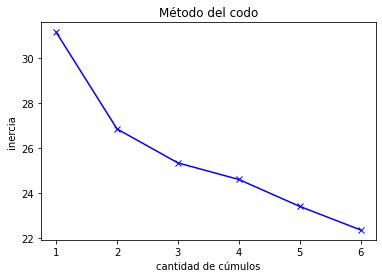

In [27]:
ks = []
k_inertia = []
for k in range (1,7):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)

plt.xlabel('cantidad de cúmulos')
plt.ylabel('inercia')
plt.title('Método del codo')
plt.plot(ks,k_inertia, 'bx-')

In [28]:
k=2
model= KMeans(n_clusters=k)
model.fit(tfidf_matrix)

data['cluster']=model.labels_
data.head(53)

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

### Términos más importantes para cada uno de los clusters

##### Centroides del modelo

In [29]:
k=2
model= KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs= NearestNeighbors(n_neighbors=2, metric="euclidean").fit(tfidf_matrix.values)

In [30]:
tfidf_vect.vocabulary_

{'ii': 11711,
 'consideraciones': 5056,
 'corte': 5749,
 'constitucional': 5151,
 'primera': 17886,
 'competencia': 4344,
 'corresponde': 5707,
 'analizar': 1421,
 'sala': 20496,
 'revisión': 20218,
 'fallo': 10159,
 'proferido': 18063,
 'dentro': 6701,
 'acción': 208,
 'tutela': 22737,
 'referencia': 19241,
 'fundamento': 10694,
 'artículos': 2112,
 'constitución': 5163,
 'decreto': 6394,
 'segunda': 20723,
 'debate': 6257,
 'afirmaron': 817,
 'actores': 404,
 'otorgó': 16284,
 'señor': 20922,
 'héctor': 11587,
 'jesús': 13453,
 'sarria': 20624,
 'concesión': 4611,
 'explotación': 9882,
 'territorios': 22169,
 'corresponden': 5708,
 'mediara': 14567,
 'consulta': 5222,
 'previa': 17842,
 'alguna': 1129,
 'cuanto': 5951,
 'informó': 12538,
 'consultó': 5250,
 'comunidad': 4508,
 'directamente': 7639,
 'afectada': 768,
 'tercera': 22123,
 'protección': 18354,
 'debe': 6267,
 'identidad': 11637,
 'integridad': 12897,
 'étnica': 23889,
 'cultural': 6050,
 'social': 21184,
 'económica': 81

In [31]:
len(tfidf_vect.vocabulary_)

23942

### Centroides y términos más cercanos

In [32]:
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[ 5151, 20808,  2111, ..., 16593, 10179, 23820],
       [12418,  4509, 18527, ...,  7881, 20336,  4095]], dtype=int64)

In [33]:
data['cluster']=model.labels_

centroides= model.cluster_centers_
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
terms= tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range (k):
    print(f"Cluster #{i}")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :500]:#este es el número de palabras que quiero que me muestre por cluster
          print(f"{terms[idx]}", end=" ")
    print("\n\n")

CLUSTERS:

Cluster #0
TERMINOS:  constitucional sentencia artículo ley corte popular consulta territoriales territorial competencias constitución entidades nacional participación recursos sala municipio desarrollo tutela minera decisión si autoridades explotación debe derecho caso ambiente ser así competencia tribunal naturales principio suelo autonomía principios puede acción pregunta actividades derechos ordenamiento parte proceso administrativo territorio manera precedente protección concurrencia medio municipios actividad coordinación política subsuelo nación materia judicial providencia constitucionalidad ciudadana forma minería ii sección decisiones respecto autoridad ambiental anterior dentro orden deben pues orgánica renovables ejercicio ello mediante consultas general nivel tal exploración constitucionales uso asuntos mecanismo subsidiariedad jurídico defecto normas artículos texto acuerdo cogua minas social iii pueden judiciales sentencias populares cuenta fundamentales requi

### Documentos que integran los clusters

In [34]:
nbrs= NearestNeighbors(n_neighbors=2, metric="euclidean").fit(tfidf_matrix.values)

In [35]:
data['cluster'] = model.labels_

#por buena práctica hacemos la siguiente linea
clust_cnt=data ['cluster'].value_counts()
clust_cnt_pct=data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range (k):
    print(f"Cluster #{i} ")
    print (f"{clust_cnt[i]} textos ({clust_cnt[i]:.2%} de los datos)")
    print(f"TERMINOS: "  , end=" ")
    for idx in order_centroids[i, :200]:
        print (f"{terms[idx]}", end= " ")
    print ("\n\n")
    print (f"Términos representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides [i]])[1][0]]['Texto'].values:
        print(f"*{texto}")
    print ("\n\n")

CLUSTERS:

Cluster #0 
30 textos (3000.00% de los datos)
TERMINOS:  constitucional sentencia artículo ley corte popular consulta territoriales territorial competencias constitución entidades nacional participación recursos sala municipio desarrollo tutela minera decisión si autoridades explotación debe derecho caso ambiente ser así competencia tribunal naturales principio suelo autonomía principios puede acción pregunta actividades derechos ordenamiento parte proceso administrativo territorio manera precedente protección concurrencia medio municipios actividad coordinación política subsuelo nación materia judicial providencia constitucionalidad ciudadana forma minería ii sección decisiones respecto autoridad ambiental anterior dentro orden deben pues orgánica renovables ejercicio ello mediante consultas general nivel tal exploración constitucionales uso asuntos mecanismo subsidiariedad jurídico defecto normas artículos texto acuerdo cogua minas social iii pueden judiciales sentencias p

### Visualización usando PCA

In [36]:
data['texto_peq']=data['textoLimpio'].apply(lambda texto: texto[:100])
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [37]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values
result['nombre'] = data.NombreSentencias.values

result

X         Y  cluster  \
0   0.480302 -0.245673        1   
1  -0.148831  0.114561        0   
2  -0.290452  0.079390        0   
3  -0.237022  0.270116        0   
4  -0.344350 -0.114600        0   
5  -0.324344  0.005046        0   
6  -0.354582 -0.153651        0   
7  -0.313301 -0.091977        0   
8  -0.306085 -0.060922        0   
9  -0.364519 -0.156588        0   
10 -0.323050 -0.063156        0   
11 -0.337664 -0.143887        0   
12 -0.272394  0.120062        0   
13 -0.304425  0.089045        0   
14 -0.331433 -0.012934        0   
15 -0.261984  0.094791        0   
16 -0.380826 -0.092904        0   
17 -0.278414  0.019069        0   
18 -0.336850 -0.006679        0   
19  0.305909  0.304165        1   
20 -0.171292 -0.137001        0   
21  0.211816  0.241642        1   
22 -0.003594 -0.014961        0   
23  0.204281 -0.247917        1   
24 -0.263667 -0.099817        0   
25  0.122156  0.255001        1   
26  0.388963 -0.328423        1   
27  0.185206 -0.358474        1   
28  0.452087 -0.196761        1   
29  0.409795  0.025790        1   
30  0.430421 -0.148879        1   
31  0.427797 -0.277205        1   
32  0.395271 -0.162555        1   
33  0.288123  0.159052        1   
34  0.402002  0.046820        1   
35  0.363902  0.107155        1   
36  0.469482 -0.262184        1   
37  0.339481 -0.024987        1   
38 -0.270893  0.007673        0   
39 -0.149411  0.169630        0   
40 -0.018349  0.074749        0   
41 -0.169940 -0.068196        0   
42  0.298075 -0.159907        1   
43  0.041951  0.095731        0   
44 -0.101798  0.011681        0   
45 -0.269906 -0.128751        0   
46 -0.397243 -0.107714        0   
47  0.235525  0.597146        1   
48  0.127081  0.190447        1   
49  0.287868  0.183518        1   
50 -0.112262  0.024766        0   
51  0.238431  0.489417        1   
52  0.332955  0.090236        1   

                                                texto  \
0   ii consideraciones corte constitucional primer...   
1   consideraciones sala acción tutela consagrada ...   
2   i consideraciones orden resolver presente soli...   
3   ii consideraciones sala competencia sala compe...   
4   consideraciones resolver impugnación presentad...   
5   consideraciones sala acción tutela consagrada ...   
6   ii consideraciones sala competencia sala compe...   
7   i consideraciones sala competencia conformidad...   
8   consideraciones sala competencia sala competen...   
9   iv consideraciones sala acción tutela providen...   
10  ii consideraciones sala acción tutela consagra...   
11  consideraciones competencia sala competente co...   
12  v consideraciones sala v competencia sala comp...   
13  i consideraciones competencia sala competente ...   
14  consideraciones competencia acuerdo numeral º ...   
15  consideraciones sala generalidades acción tute...   
16  vi consideraciones sala iv competencia sala co...   
17  iii consideraciones sala competencia correspon...   
18  i consideraciones competencia conformidad prev...   
19  consideraciones fundamentos corte competencia ...   
20  ii consideraciones competencia tribunal compet...   
21  consideraciones corte constitucional competenc...   
22  consideraciones competencia conforme numeral º...   
23  vi fundamentos decisión competencia corte conf...   
24  ii consideraciones corte competencia sala comp...   
25  ii consideraciones fundamentos competencia cor...   
26  consideraciones fundamentos competencia confor...   
27  consideraciones fundamentos competencia virtud...   
28  consideraciones corte constitucional competenc...   
29  consideraciones corte constitucional competenc...   
30  ii consideraciones fundamentos problema jurídi...   
31  consideraciones preliminares establecer si cas...   
32  iii revisión corte constitucional competencia ...   
33  iv consideraciones fundamentos competencia cor...   
34  consideraciones corte competencia corte consti...   
35  i consideraciones competencia corte competente...   
36  iv cons

In [38]:
result['texto'] = data.textoLimpio.apply(lambda val: val[:300])

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

### Conteo de palabras frecuentes

In [39]:
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [40]:
#Convertimos la Serie en texto y le asignamos el valor de la cantidad de palabras 
idx = pd.Index(data['textoLimpio'])
data['NumPalabras'] = 0
for i in range(len(idx.str.split())):
    data.NumPalabras[i] = len(idx.str.split()[i])

C:\Users\villa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
data[['NombreSentencias', 'NumPalabras']].sort_values(by='NumPalabras', ascending=False)

NombreSentencias  NumPalabras
25                              361-17_Consid.pdf.txt        40987
33                              622-16_Consdi.pdf.txt        38212
40                            C-035-16_Consid.pdf.txt        30879
45                            SU095-18_Consid.pdf.txt        29556
29                             462A-14_Consid.pdf.txt        27960
19                              256-15_Consid.pdf.txt        27389
42                            C-389-16_Consid.pdf.txt        27225
50                            T-445-16_Consid.pdf.txt        23952
22                              298-16_Consid.pdf.txt        23342
26                              366-11_Consid.pdf.txt        18666
21                              275-19_Consid.pdf.txt        16801
47                            SU698-17_Consid.pdf.txt        15954
51                            T-614-19_Consid.pdf.txt        15927
52                            T-713-17_Consid.pdf.txt        14639
38                                    A053-17.pdf.txt        13602
39                                    A281-19.pdf.txt        13248
30                              530-16_Consid.pdf.txt        13210
28                              438-15_Consid.pdf.txt        12911
31                              547-10_Consid.pdf.txt        11363
36                              766-15_Consid.pdf.txt        11341
32                              568-17_Consid.pdf.txt        11273
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt         9846
24                              342-19_Consid.pdf.txt         9693
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt         9445
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt         8966
27                                     395-12.pdf.txt         8928
37                              955-03_Consid.pdf.txt         8917
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt         8504
0                             1045a-10_Consid.pdf.txt         8503
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt         8038
46                            Su411-20_Consid.pdf.txt         8005
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt         7881
41                            C-123-14_Consid.pdf.txt         7767
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt         7724
48                               SU_133-17_SV.pdf.txt         7344
35                              737-17_Consid.pdf.txt         7127
49                             T-272-17_consi.pdf.txt         6976
34                              652-98_Consid.pdf.txt         6553
20                              273-16_Consid.pdf.txt         6340
23                              331-12_Consid.pdf.txt         6190
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt         6185
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt         5379
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt         5016
43                            C-535-96_Consid.pdf.txt         4861
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt         4220
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt         4151
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt         4101
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt         3394
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...         2912
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt         2893
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt         2268
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt         1868
44                            C-795-00_Consid.pdf.txt         1846

In [42]:
#Concatenamos todas las palabras que están dentro del campo donde se indican los argumentos de la corte

texto = " ".join(razon for razon in data['textoLimpio'])

In [43]:
print ("Existen {} palabras en las consideraciones de la Corte Constitucional".format(len(texto)))

Existen 5715915 palabras en las consideraciones de la Corte Constitucional


In [44]:
import nltk
from nltk.corpus import stopwords
from nltk import collections

In [45]:
#Descargamso las palabras de conexión o StopWords para que no nos aparezca estas palabras dentro del conteo 
nltk.download('stopwords')
palabras_conexion = set(stopwords.words('spanish'))

#Eliminamos de nuestra lista, las palabras conexión
palabrasLimpias = [palabra for palabra in texto.lower().split() if not palabra in palabras_conexion]

#Transformamos a lista y contamos la cantidad de ocurrencias por palabra
palabras = collections.Counter(list(palabrasLimpias))

#Luego, lo pasamos a un DataFrame:
dfPalabras = pd.DataFrame(palabras.most_common(50),
                         columns=['palabra','cantidad'])

palabras.most_common(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('artículo', 4251),
 ('derecho', 4050),
 ('constitucional', 3969),
 ('sentencia', 3933),
 ('corte', 3922),
 ('ley', 3468),
 ('comunidades', 3398),
 ('derechos', 3397),
 ('c', 3388),
 ('consulta', 3138),
 ('participación', 2765),
 ('recursos', 2585),
 ('desarrollo', 2554),
 ('indígenas', 2512),
 ('t', 2303),
 ('nacional', 2260),
 ('constitución', 2253),
 ('ambiente', 2203),
 ('debe', 2065),
 ('protección', 2045),
 ('así', 1990),
 ('ambiental', 1963),
 ('caso', 1939),
 ('parte', 1905),
 ('explotación', 1900),
 ('ser', 1898),
 ('proceso', 1894),
 ('sala', 1811),
 ('p', 1787),
 ('territorio', 1749),
 ('si', 1746),
 ('naturales', 1731),
 ('entidades', 1695),
 ('territoriales', 1667),
 ('tutela', 1660),
 ('principio', 1633),
 ('comunidad', 1601),
 ('minera', 1593),
 ('territorial', 1588),
 ('pueblos', 1575),
 ('autoridades', 1552),
 ('manera', 1546),
 ('puede', 1525),
 ('acción', 1510),
 ('previa', 1498),
 ('actividades', 1495),
 ('medio', 1495),
 ('decisión', 1477),
 ('m', 1421),
 ('compet

In [46]:
dfPalabras.tail()

palabra  cantidad
45   actividades      1495
46         medio      1495
47      decisión      1477
48             m      1421
49  competencias      1357

### Palabras a excel

In [47]:
dfPalabras.to_excel('TodasTodas.xls')

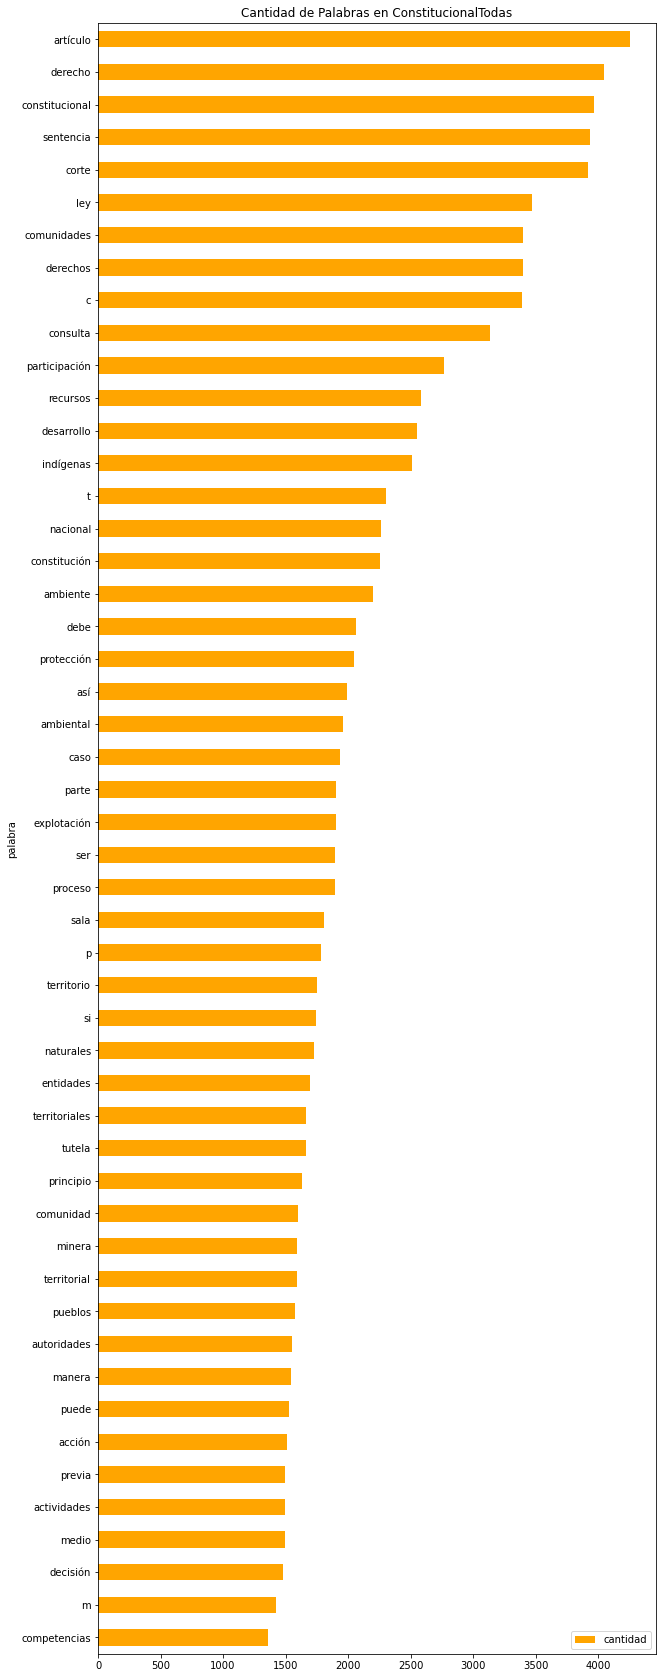

In [48]:
#Ahora, imprimamos en un Plot de Barras el resultado de las palabras más comunes
fig, ax = plt.subplots(figsize=(10, 30))

dfPalabras.sort_values(by='cantidad').plot.barh(x='palabra',
                      y='cantidad',
                      ax=ax,
                      color="orange")

ax.set_title("Cantidad de Palabras en ConstitucionalTodas")

plt.show()

### DHL para identificar contexto de las frases comunes

In [49]:
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [50]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [51]:
def pre_procesado(texto):
    texto=str(texto)
    texto = texto.lower()
    #texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = re.sub(r"[\s]+", " ", texto) 
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    #texto = [spanishStemmer.stem(palabra) for palabra in texto.split() ]
    return texto

In [52]:
data['pre_procesado'] = data['Texto'].apply(lambda texto: pre_procesado(texto))
data

NombreSentencias  \
0                             1045a-10_Consid.pdf.txt   
1        11001-03-15-000-2013-02635-00_Consid.pdf.txt   
2    11001-03-15-000-2016-02396-00(AC)_Consid.pdf.txt   
3    11001-03-15-000-2016-02396-01(AC)_Consid.pdf.txt   
4    11001-03-15-000-2017-02514-01(AC)_Consid.pdf.txt   
5    11001-03-15-000-2017-02515-01(AC)_Consid.pdf.txt   
6    11001-03-15-000-2017-02516-01(AC)_Consid.pdf.txt   
7    11001-03-15-000-2017-02518-00(AC)_Consid.pdf.txt   
8    11001-03-15-000-2017-02829-00(AC)_Consid.pdf.txt   
9    11001-03-15-000-2017-02829-01(AC)_Consid.pdf.txt   
10       11001-03-15-000-2018-00669-00_Consid.pdf.txt   
11   11001-03-15-000-2018-00669-01(AC)_Consid.pdf.txt   
12   11001-03-15-000-2018-00900-00(AC)_Consid.pdf.txt   
13   11001-03-15-000-2018-00900-01(AC)_Consid.pdf.txt   
14   11001-03-15-000-2018-01946-00(AC)_Consid.pdf.txt   
15  11001-03-15-000-2018-01946-01(AC)2018-02067-01...   
16   11001-03-15-000-2018-03854-00(AC)_Consid.pdf.txt   
17   11001-03-15-000-2018-04384-00(AC)_Consid.pdf.txt   
18   11001-03-15-000-2019-00588-00(AC)_Consid.pdf.txt   
19                              256-15_Consid.pdf.txt   
20                              273-16_Consid.pdf.txt   
21                              275-19_Consid.pdf.txt   
22                              298-16_Consid.pdf.txt   
23                              331-12_Consid.pdf.txt   
24                              342-19_Consid.pdf.txt   
25                              361-17_Consid.pdf.txt   
26                              366-11_Consid.pdf.txt   
27                                     395-12.pdf.txt   
28                              438-15_Consid.pdf.txt   
29                             462A-14_Consid.pdf.txt   
30                              530-16_Consid.pdf.txt   
31                              547-10_Consid.pdf.txt   
32                              568-17_Consid.pdf.txt   
33                              622-16_Consdi.pdf.txt   
34                              652-98_Consid.pdf.txt   
35                              737-17_Consid.pdf.txt   
36                              766-15_Consid.pdf.txt   
37                              955-03_Consid.pdf.txt   
38                                    A053-17.pdf.txt   
39                                    A281-19.pdf.txt   
40                            C-035-16_Consid.pdf.txt   
41                            C-123-14_Consid.pdf.txt   
42                            C-389-16_Consid.pdf.txt   
43                            C-535-96_Consid.pdf.txt   
44                            C-795-00_Consid.pdf.txt   
45                            SU095-18_Consid.pdf.txt   
46                            Su411-20_Consid.pdf.txt   
47                            SU698-17_Consid.pdf.txt   
48                               SU_133-17_SV.pdf.txt   
49                             T-272-17_consi.pdf.txt   
50                            T-445-16_Consid.pdf.txt   
51                            T-614-19_Consid.pdf.txt   
52                            T-713-17_Consid.pdf.txt   

                                                Texto  \
0   II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1    \nCONSIDERACIONES DE LA SALA \n \nLa acción d...   
2   I. \nCONSIDERACIONES  \n \nEn orden a resolver...   
3   II. CONSIDERACIONES DE LA SALA \n \n1. Compete...   
4   CONSIDERACIONES \n \nPara resolver la impugnac...   
5   CONSIDERACIONES DE LA SALA \n \n1. \nLa acción...   
6   II. CONSIDERACIONES DE LA SALA \n \n2.1. Compe...   
7   I. \nCONSIDERACIONES DE LA SALA \n \n1.1. \nCO...   
8   CONSIDERACIONES DE LA SALA \n \n1. Competencia...   
9   IV. CONSIDERACIONES DE LA SALA  \nLa acción de...   
10   \n \nII. CONSIDERACIONES DE LA SALA \n \nLa a...   
11  1. CONSIDERACIONES \n2.1. Competencia \n \nEst...   
12  V. CONSIDERACIONES DE LA SALA \n \nV.1. Compet...   
13  I. CONSIDERACIONES \n \n1. Competencia  \n \nL...   
14  . Consideraciones \n \n3.1. Competencia \nDe a...   
15  CONSIDERACIONES DE LA SALA \n \n1. \nGener

In [53]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
dictionary = Dictionary(data['pre_procesado'].values)
dictionary

In [55]:
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in data['pre_procesado'].values]
corpus;

In [58]:
model1 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=9, passes=300)
model1

model1.print_topics(num_words=100)

[(0,
  '0.000*"131" + 0.000*"emitidas" + 0.000*"empero" + 0.000*"físicas" + 0.000*"consultando" + 0.000*"contemplados" + 0.000*"constituyente." + 0.000*"1996." + 0.000*"2004;" + 0.000*"2067" + 0.000*"21," + 0.000*"236" + 0.000*"241," + 0.000*"35," + 0.000*"361" + 0.000*"41," + 0.000*"48," + 0.000*"59," + 0.000*"78," + 0.000*"8º" + 0.000*"abogado" + 0.000*"accionantes;" + 0.000*"discutir" + 0.000*"aclarando" + 0.000*"dieciséis" + 0.000*"desconocida" + 0.000*"condiciona" + 0.000*"concuerda" + 0.000*"componentes" + 0.000*"concertado" + 0.000*"biológica," + 0.000*"impidiendo" + 0.000*"anexos" + 0.000*"ambientales:" + 0.000*"allá" + 0.000*"administrativa." + 0.000*"adición" + 0.000*"bogotá:" + 0.000*"baja" + 0.000*"hectáreas." + 0.000*"contemplar" + 0.000*"convertir" + 0.000*"coordenadas" + 0.000*"crearon" + 0.000*"cree" + 0.000*"dadas" + 0.000*"demás," + 0.000*"determinantes" + 0.000*"actual," + 0.000*"acueducto" + 0.000*"admitido" + 0.000*"campo" + 0.000*"carretera" + 0.000*"casos." + 0.0

In [59]:
lda_display = pyLDAvis.gensim.prepare(model1, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
# pyLDAvis.save_html(lda_display, 'lda.html')